# Compare to baseline results

This script is used to generate plots/final results from raw results coming from simulations along with a set of results to use as a baseline

In [1]:
import os, sys
parent_dir = os.path.abspath('..')

if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from numpy.random import default_rng
rng = default_rng()

In [3]:
print(list(np.round(np.logspace(-1, 0, 31), decimals=3))[::-1])

[1.0, 0.926, 0.858, 0.794, 0.736, 0.681, 0.631, 0.584, 0.541, 0.501, 0.464, 0.43, 0.398, 0.369, 0.341, 0.316, 0.293, 0.271, 0.251, 0.233, 0.215, 0.2, 0.185, 0.171, 0.158, 0.147, 0.136, 0.126, 0.117, 0.108, 0.1]


In [4]:
# Specify the methods to compare
method_keys = ['true', 
               'cospar-st', 
               'cospar-mt', 
               'lineageot-st', 
               'lineageot-mt'
              ]

In [5]:
result_keys = ['baseline', 'effect']
DIR = {
    'effect': "../../data/sim-1-effect",
    'baseline': "../../data/sim-1-baseline"
      }

In [6]:
plt.style.use('plot_style.txt')

## Load the data

In [7]:
#Load the raw and baseline results files as dataframes
stats_dfs = {}
MT_census_dfs = {}
transition_table_dfs = {}
fate_dfs = {}
ancestor_dfs = {}
growth_dfs = {}
for k in result_keys: 
    RAW_RESULTS_DIR = DIR[k]
    
    stats_dfs[k] = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "statistics.csv"))
    MT_census_dfs[k] = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "MT_census.csv"))
    transition_table_dfs[k] = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "transition_tables.csv"))
    fate_dfs[k] = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "fate_probability_results.csv"))
    ancestor_dfs[k] = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "ancestor_distribution_results.csv"))
    growth_dfs[k] = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "growth_statistics.csv"))

In [8]:
# Get the simulation, sampling rate and method info
for k in result_keys:
    stats_df = stats_dfs[k]
    
    simulation_keys = list(stats_df['Simulation'].unique())
    simulation_keys.sort()
    n_simulations = len(simulation_keys)

    sampling_rates = list(stats_df['Sample rate'].unique())
    sampling_rates.sort(reverse=True)
    sample_keys = [str(r) for r in sampling_rates]

    print(simulation_keys)
    print(sample_keys)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['1.0', '0.926', '0.858', '0.794', '0.736', '0.681', '0.631', '0.584', '0.541', '0.501', '0.464', '0.43', '0.398', '0.369', '0.341', '0.316', '0.293', '0.271', '0.251', '0.233', '0.215', '0.2', '0.185', '0.171', '0.158', '0.147', '0.136', '0.126', '0.117', '0.108', '0.1']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['1.0', '0.926', '0.858', '0.794', '0.736', '0.681', '0.631', '0.584', '0.541', '0.501', '0.464', '0.43', '0.398', '0.369', '0.341', '0.316', '0.293', '0.271', '0.251', '0.233', '0.215', '0.2', '0.185', '0.171', '0.158', '0.147', '0.136', '0.126', '0.117', '0.108', '0.1']


In [9]:
# Extract the time info
timepoints = list(stats_df['Order'].unique())
timepoints.sort()

assert len(timepoints) == 2
t1 = float(timepoints[0])
t2 = float(timepoints[1])

print(timepoints)

[1.0, 2.0]


In [10]:
# Get cell type information
cell_types_at_t1 = list(transition_table_dfs[k]['Cell type t1'].unique())
cell_types_at_t2 = list(transition_table_dfs[k]['Cell type t2'].unique())
cell_types = {str(t1): cell_types_at_t1, str(t2): cell_types_at_t2}

cell_types


{'1.0': ['progenitor', 'type A'], '2.0': ['type A', 'type B']}

In [11]:
# Specify the barcoding rate used (should change to save and extract from raw results)
barcode_rate=0.8

In [12]:
# Assign colors by cell type for plotting
celltype_color = {'progenitor': 'tab:green',
                  'type A': 'tab:red',
                  'type B': 'tab:blue'}

## Summarise that statistics of the simulated datasets

In [13]:
# Print the mean t2 sampling rates
t2_sample_keys = {}
for k in result_keys:
    print(k)
    stats_df = stats_dfs[k]
    
    values = []
    for r in sampling_rates:
        values.append(1000/stats_df[(stats_df['Sample rate'] == r) & (stats_df['Order'] == 2)]['N cells'].mean())

    print("Mean t2 sampling rates: ", np.round(np.array(values)*0.8, decimals=5))
    t2_sample_keys[k] = [str(r) for r in np.round(values, decimals=5)]

baseline
Mean t2 sampling rates:  [0.13333 0.12346 0.11416 0.10582 0.09804 0.09058 0.08396 0.0777  0.07199
 0.06667 0.06184 0.05727 0.05299 0.04916 0.04541 0.04209 0.03903 0.03611
 0.03343 0.03107 0.02866 0.02667 0.02465 0.0228  0.02106 0.0196  0.01813
 0.01679 0.0156  0.0144  0.01333]
effect
Mean t2 sampling rates:  [0.1476  0.13034 0.12229 0.11406 0.1075  0.09699 0.0927  0.08471 0.0775
 0.07041 0.06739 0.06187 0.05648 0.05321 0.04832 0.04489 0.04215 0.0394
 0.03532 0.0328  0.03059 0.0282  0.02656 0.02426 0.02275 0.02097 0.01925
 0.018   0.01688 0.01558 0.01414]


In [14]:
for i in range(len(sampling_rates)):
    r = sampling_rates[i]
    r1 = float(t2_sample_keys['baseline'][i])
    r2 = float(t2_sample_keys['effect'][i])
    print(np.round(r*0.8, decimals=5), 
          np.round(r1*0.8, decimals=5), 
          np.round(r2*0.8, decimals=5))

0.8 0.13334 0.1476
0.7408 0.12346 0.13034
0.6864 0.11415 0.12229
0.6352 0.10582 0.11406
0.5888 0.09804 0.1075
0.5448 0.09058 0.09699
0.5048 0.08396 0.0927
0.4672 0.0777 0.08471
0.4328 0.07199 0.0775
0.4008 0.06666 0.07041
0.3712 0.06184 0.06738
0.344 0.05727 0.06187
0.3184 0.05299 0.05648
0.2952 0.04917 0.05321
0.2728 0.04542 0.04831
0.2528 0.04209 0.0449
0.2344 0.03903 0.04214
0.2168 0.03611 0.03941
0.2008 0.03343 0.03532
0.1864 0.03106 0.0328
0.172 0.02866 0.03059
0.16 0.02666 0.0282
0.148 0.02466 0.02656
0.1368 0.0228 0.02426
0.1264 0.02106 0.02274
0.1176 0.0196 0.02097
0.1088 0.01813 0.01925
0.1008 0.01679 0.018
0.0936 0.0156 0.01688
0.0864 0.0144 0.01558
0.08 0.01334 0.01414


baseline
Mean for progenitor = 6.0
Standard deviation for progenitor = 0.0
Mean for type A = 6.0
Standard deviation for type A = 0.0
effect
Mean for progenitor = 8.0
Standard deviation for progenitor = 0.0
Mean for type A = 3.2052590306068747
Standard deviation for type A = 2.4026159613244555


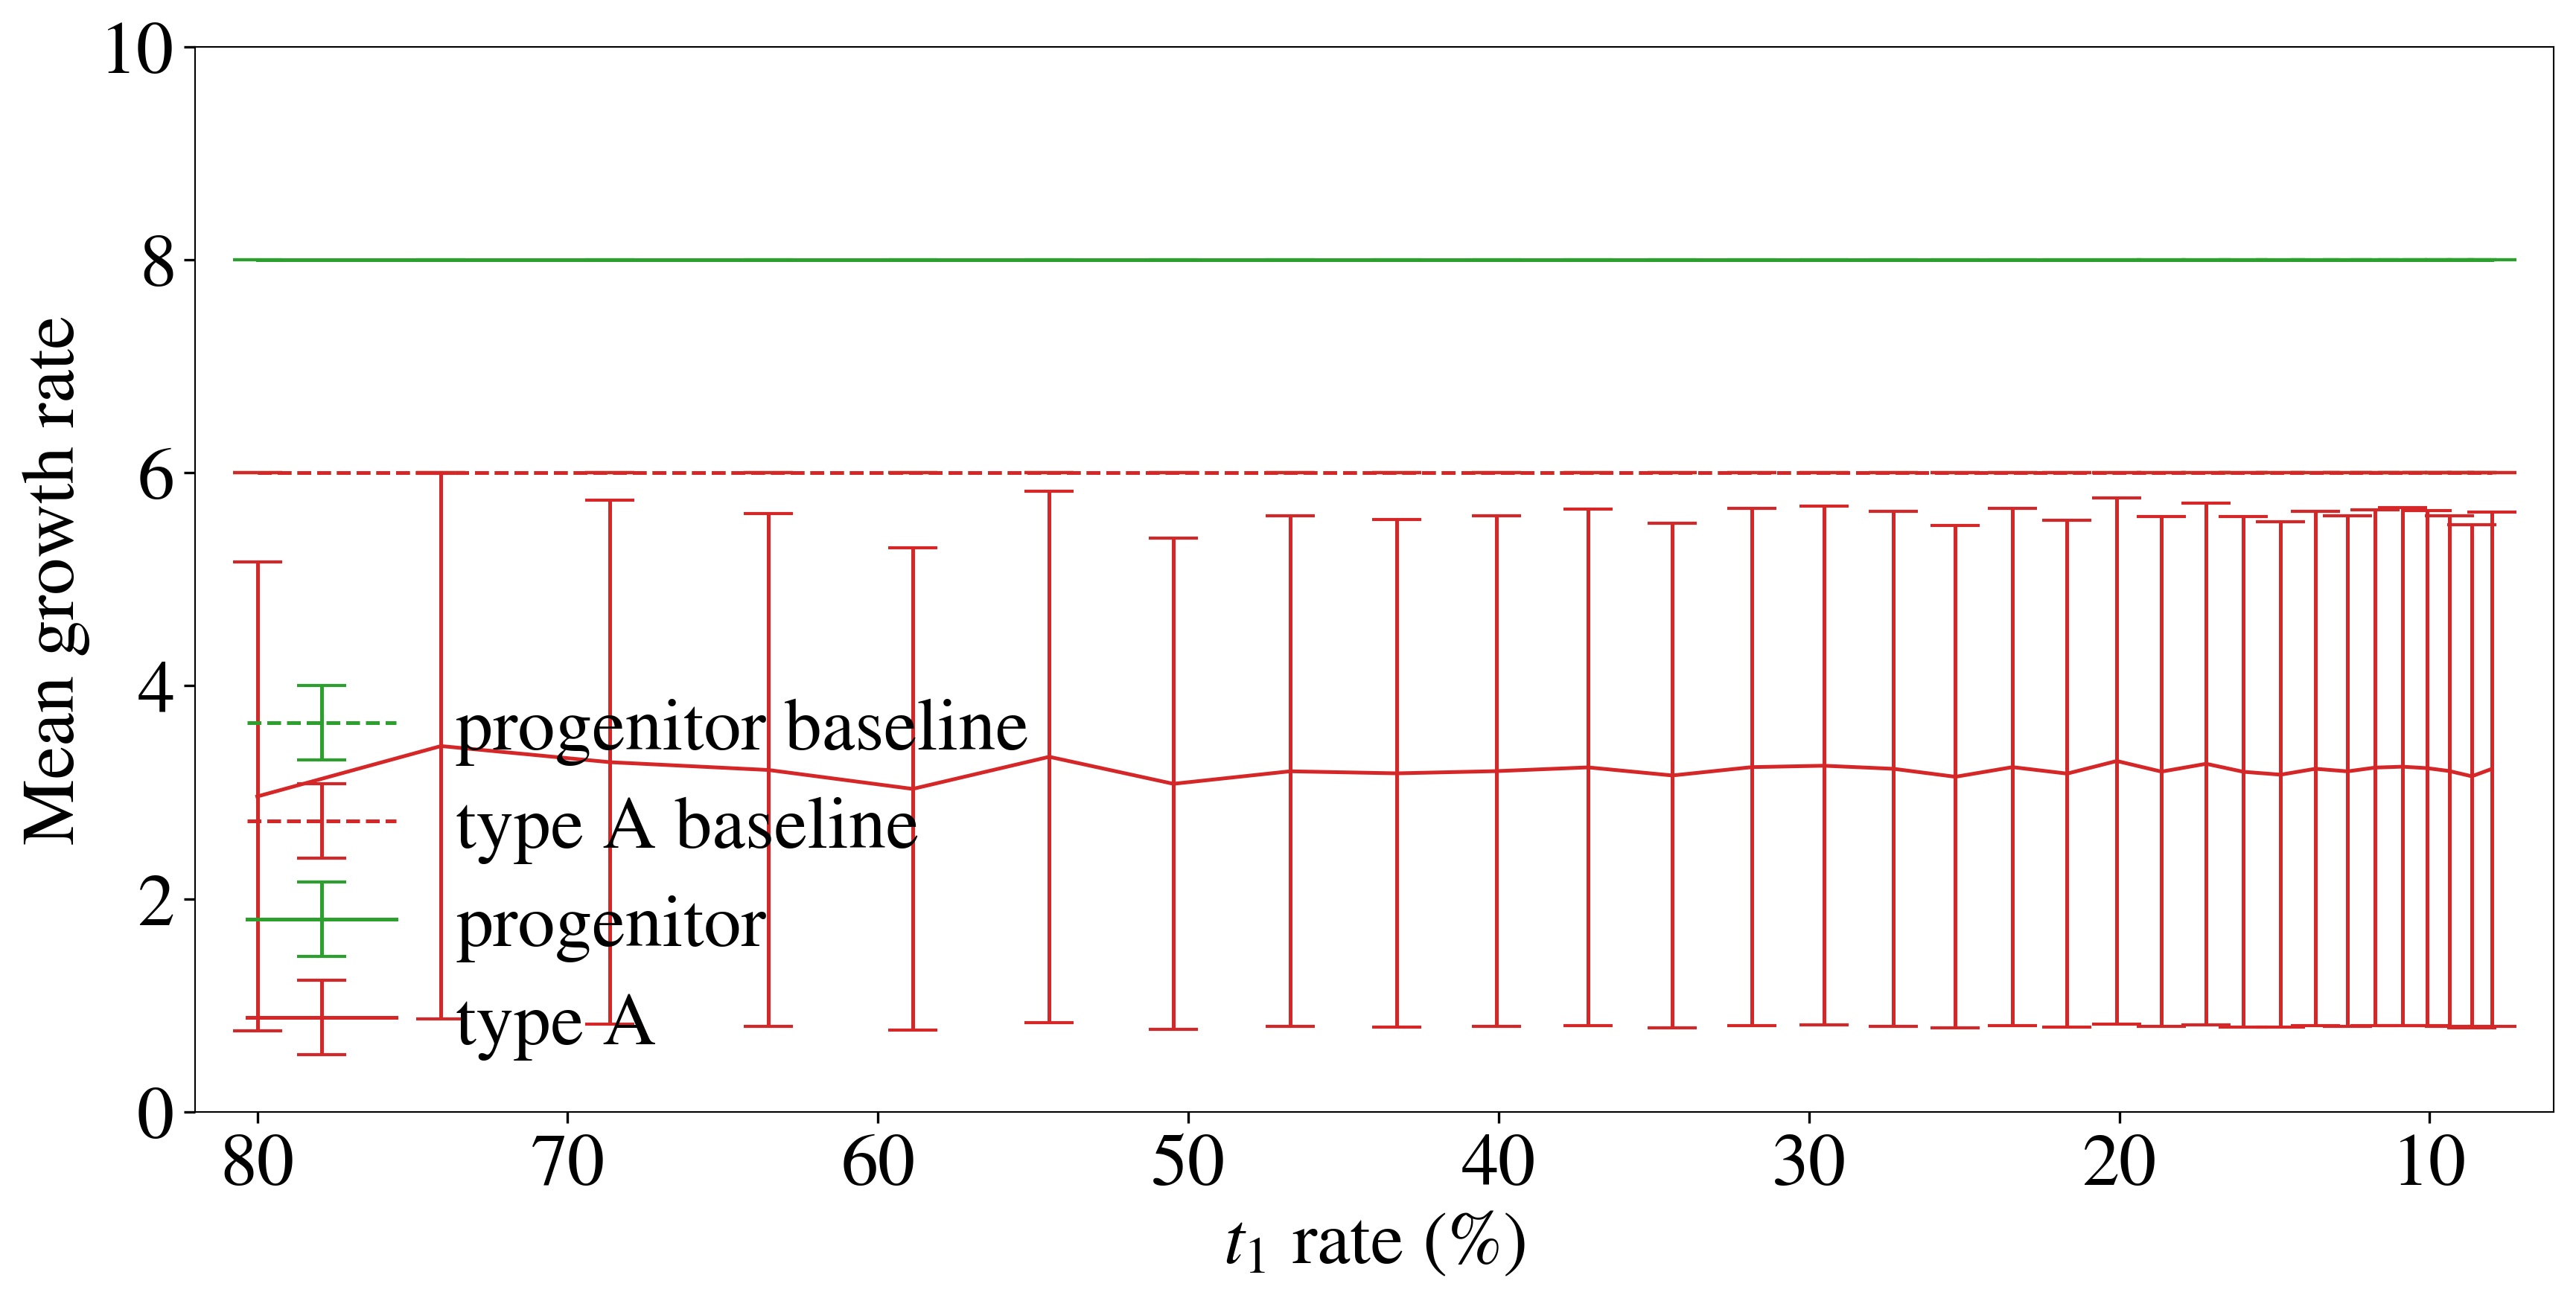

In [15]:
# Plot the mean growth rates over sampling rates
fig, ax = plt.subplots(figsize=(12,6))
fig.tight_layout()
# plt.title('Mean growth rate (over cells, over simulations)', fontweight="bold")
x_label_t1 = "$t_1$ rate (%)"
plt.xlabel(x_label_t1)
plt.ylabel("Mean growth rate")

sample_label_positions = np.arange(0.1, 0.9, 0.1)[::-1]
sample_labels = [str(int(100*s)) for s in sample_label_positions]

xlims = (0.82, 0.06)
ax.set_xticks(sample_label_positions, sample_labels)
ax.set_xlim(xlims[0], xlims[1])

# Compute and plot the statistics
for k in result_keys:
    print(k)
    growth_df = growth_dfs[k]
    
    for i in range(len(cell_types_at_t1)):
        c = cell_types_at_t1[i]

        growth_mean = np.zeros(len(sampling_rates))
        growth_std = np.zeros(len(sampling_rates))

        c_mask = growth_df['Cell type'] == c

        for j in range(len(sampling_rates)):
            r = sampling_rates[j]
            mask = (growth_df['Sample rate'] == r) &\
                   (growth_df['Order'] == t1) & c_mask

            growth_mean[j] = growth_df[mask]['Growth mean'].mean()
            growth_std[j] = growth_df[mask]['Growth std'].mean()

        # Plot with errorbars
        if k == 'baseline':
            ax.errorbar([s*barcode_rate for s in sampling_rates], growth_mean, yerr=growth_std, 
                    capsize=8, color=celltype_color[c], label=c + ' ' + k, linestyle='--')
        else:
            ax.errorbar([s*barcode_rate for s in sampling_rates], growth_mean, yerr=growth_std, 
                    capsize=8, color=celltype_color[c], label=c)

        print("Mean for {} = {}".format(c, np.mean(growth_mean)))
        print("Standard deviation for {} = {}".format(c, np.mean(growth_std)))

ax.legend(framealpha=0.5)
plt.show()

## Plot the predicted MT-census proportions at $t_1$

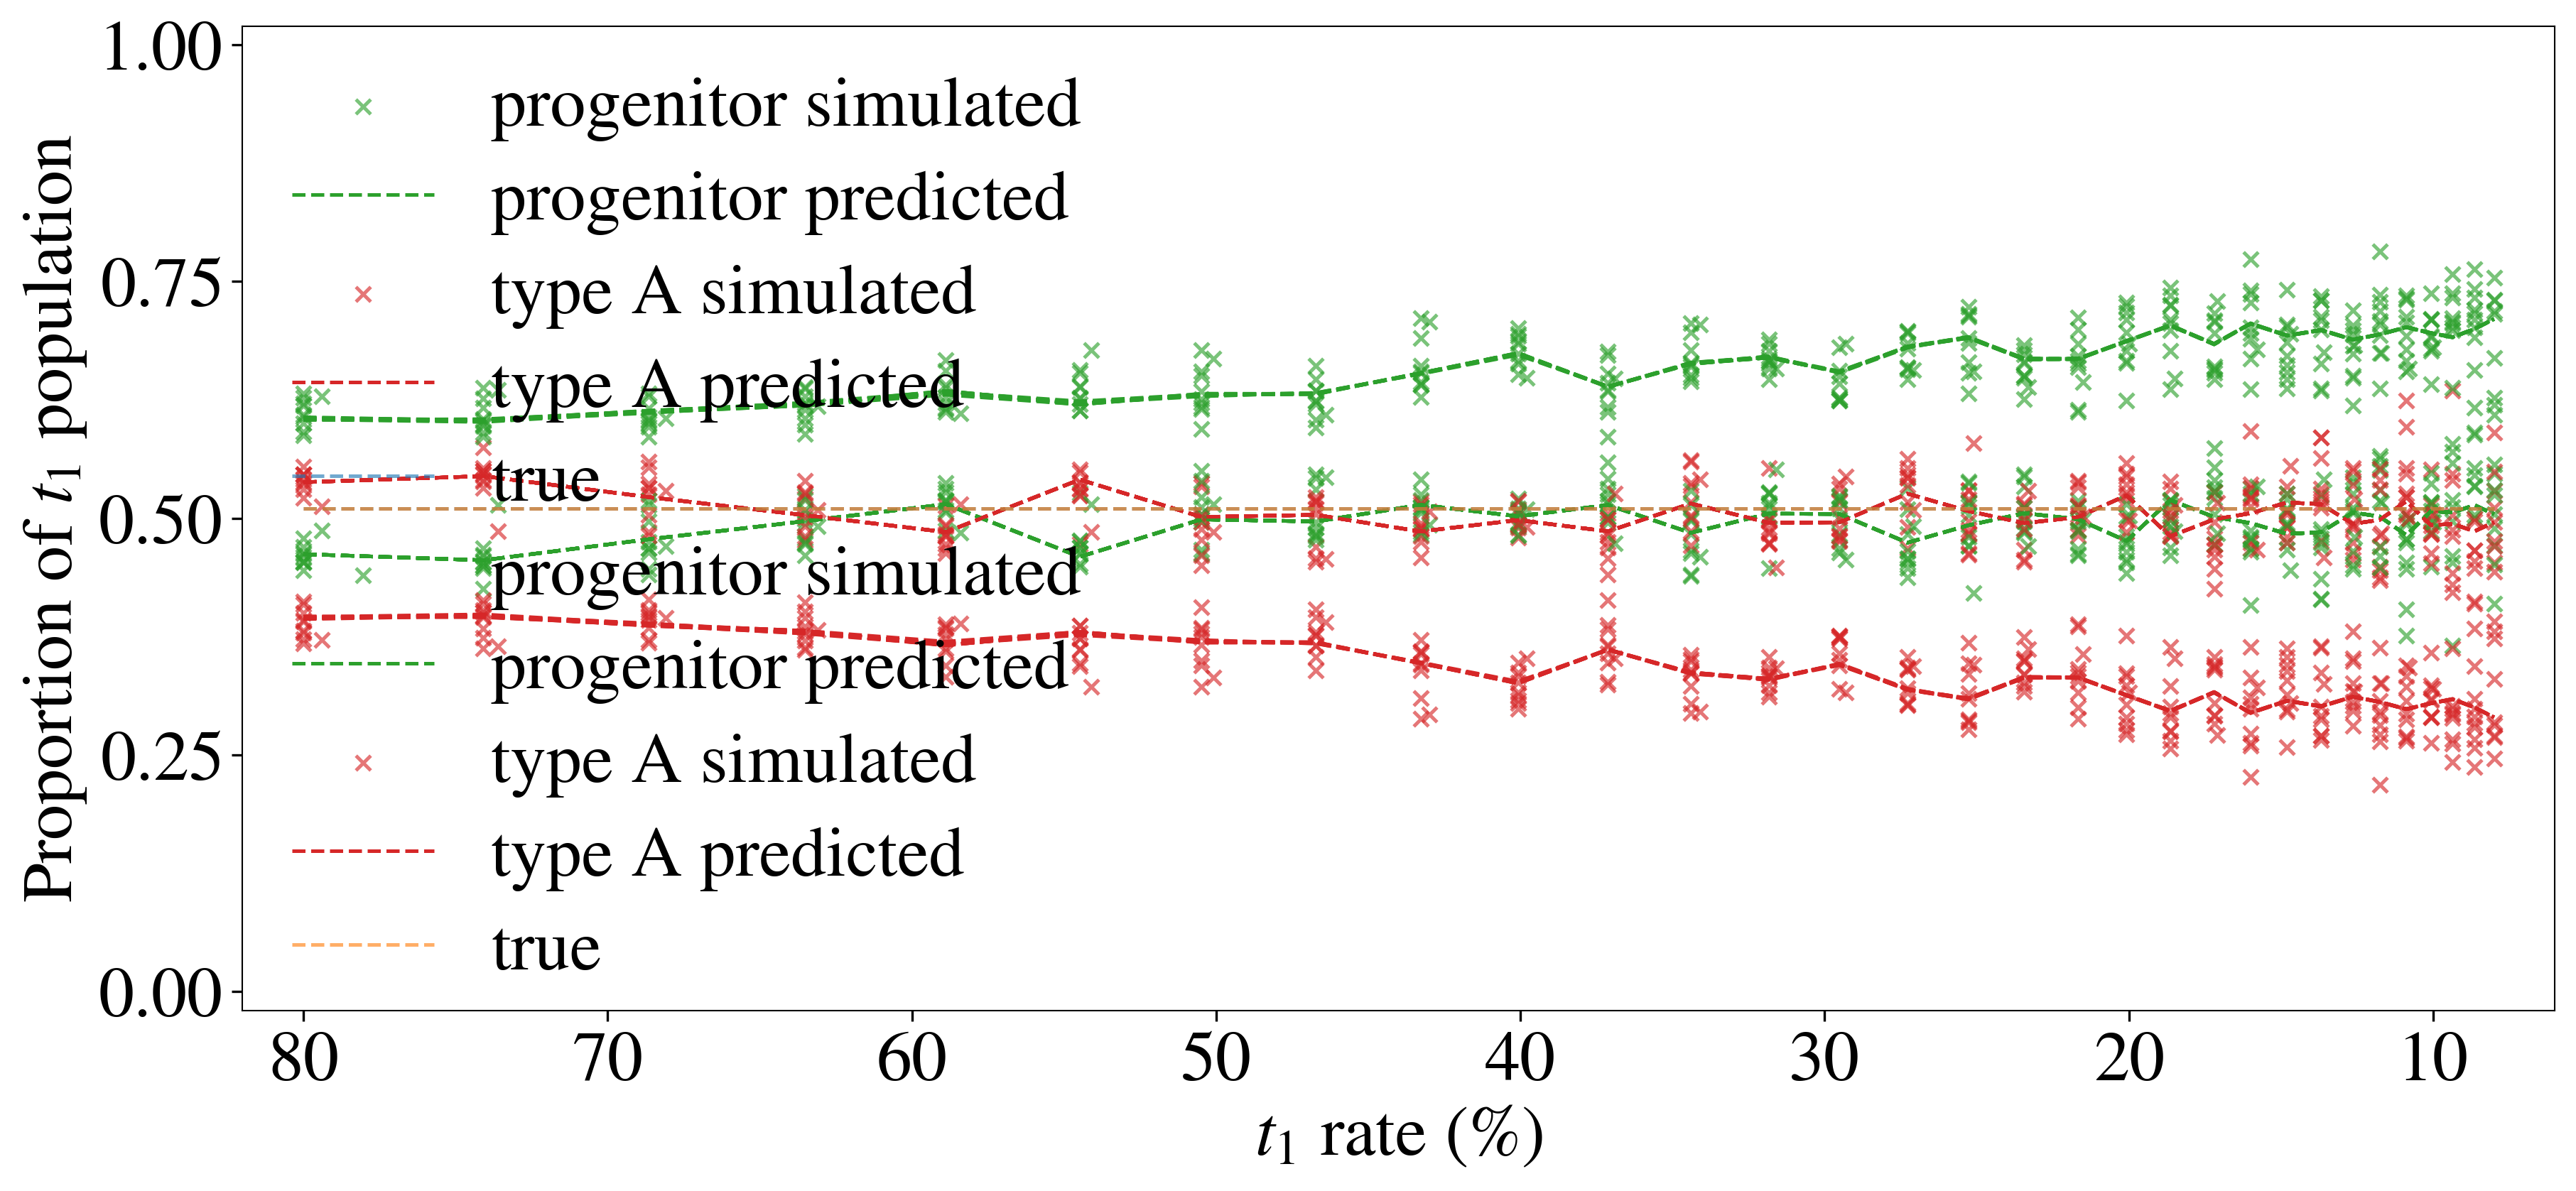

In [16]:
# Plot the cell census at different sampling rates against the predicted proportions
alpha = 0.2*((100/n_simulations)**(1/2))

fig, ax = plt.subplots(figsize=(14, 6))
# plt.title("Cell type proportions in MT at t1, b = {}".format(barcode_rate), fontweight="bold")
plt.ylabel("Proportion of $t_1$ population")
plt.xlabel(x_label_t1)

for k in result_keys:
    MT_census_df = MT_census_dfs[k]
    
    for x in range(n_simulations):
        sim_key = x
        z_t1 = np.zeros((len(cell_types[str(t1)]), len(sampling_rates)))
        p_type_given_MT = np.zeros((len(cell_types[str(t1)]), len(sampling_rates)))

        for i in range(len(sampling_rates)):
            r = sampling_rates[i]
            rate_key = sample_keys[i]

            for j in range(len(cell_types[str(t1)])):
                c = cell_types[str(t1)][j]
                mask = (MT_census_df['Simulation'] == sim_key) &\
                       (MT_census_df['Sample rate'] == r) &\
                       (MT_census_df['Order'] == t1)
                z_t1[j, i] = MT_census_df[mask][c].iloc[0]
                p_type_given_MT[j, i] = MT_census_df[mask][c + ' predicted'].iloc[0]

        if x == n_simulations-1:

            for i in range(len(cell_types[str(t1)])):
                c = cell_types[str(t1)][i]
                plt.scatter(sampling_rates, z_t1[i], label=cell_types[str(t1)][i] + ' simulated', 
                            color=celltype_color[c], alpha=alpha, marker='x')
                plt.plot([s*barcode_rate for s in sampling_rates], p_type_given_MT[i], label=c + ' predicted', color=celltype_color[c], 
                         ls="--")

            # Fill array with true proportions for the simulation from that sampling rate
            true_proportion = np.zeros(len(sampling_rates))
            for i in range(len(sampling_rates)):
                mask = (stats_df['Simulation'] == sim_key) &\
                       (stats_df['Sample rate'] == r) &\
                       (stats_df['Order'] == t1)
                true_proportion[i] = stats_df[mask]['N progenitor'].iloc[0]/stats_df[mask]['N cells'].iloc[0]   # assumes just two types at t1

            plt.plot([s*barcode_rate for s in sampling_rates], true_proportion, alpha=alpha, ls="--", label='true')

        else:
            for i in range(len(cell_types[str(t1)])):
                c = cell_types[str(t1)][i]
                plt.scatter([s*barcode_rate for s in sampling_rates], z_t1[i], color=celltype_color[c], alpha=alpha, marker='x')
                plt.plot([s*barcode_rate for s in sampling_rates], p_type_given_MT[i], color=celltype_color[c], ls="--")

# Set the x-tick labels
ax.set_xticks(sample_label_positions, sample_labels)
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(-0.02, 1.02)
            
ax.legend(framealpha=0.2)
plt.show()

## Plot the correlation between the true and estimated fate probabilites over sampling rate

In [18]:
# Plot correlation between true and estimated fate probabilities over sampling rate
linestyles = {'baseline': '--', 'effect': '-'}
effect_colours = {'baseline': 'limegreen', 'effect': 'tab:green'}
fate_dropdown = widgets.Dropdown(
    options=cell_types_at_t2,
    description='State at t2:',
    value='type A'
)
method_colours = {
    'lineageot-st': 'tab:red', 
    'lineageot-mt': 'tab:purple', 
    'cospar-mt': 'tab:green', 
    'cospar-st': 'tab:orange', 
    'true': 'tab:blue'}
effect_alpha = {'baseline': 0.6, 'effect': 1.0}
ylims = (-0.1, 1.0)

def update_fate_corr_plot(l):
    value_key = 'Fate probability correlation'
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.tight_layout()
#     plt.title("Correlation with true fate probability (mean over 10 simulations)", fontweight="bold")
    ax.set_xticks(sample_label_positions, sample_labels)
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel(x_label_t1)
    ax.set_ylabel("Correlation")

    y_mean = {}
    y_std = {}
    
    for df_key in ['baseline', 'effect']:
        for method in method_keys:
            y_mean[method] = []
            y_std[method] = []

            if method == 'true':
                line=''
                marker=None
                capsize=0
                label=None
                y_mean[method] = np.ones_like(sampling_rates)
                y_std[method] = np.zeros_like(sampling_rates)

            else:
                for r in sampling_rates:
                    df = fate_dfs[df_key]
                    mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                        (df['Cell type t2'] == l)
                    values = df[mask][value_key]

                    y_mean[method].append(values.mean())
                    y_std[method].append(values.std())

                    line = linestyles[df_key]
                    marker = 'x'
                    capsize=8
                    if method == 'cospar-st': 
                        label = 'CoSpar-ST' + ' ' + df_key
                    if method == 'cospar-mt': 
                        label = 'CoSpar-MT' + ' ' + df_key
                    elif method == 'lineageot-st':
                        label = 'LineageOT' + ' ' + df_key
                    elif method == 'lineageot-mt':
                        label = 'LineageOT-MT' + ' ' + df_key
                    elif method == 'cospar-mt-fitted':
                        label = 'CoSpar-MT-IPF' + ' ' + df_key


            ax.errorbar([s*barcode_rate for s in sampling_rates], y_mean[method], yerr=y_std[method], 
                         label=label, linestyle=line, marker=marker, capsize=capsize, 
                         c=method_colours[method], alpha=effect_alpha[df_key])
        
    ax.legend(ncol=2, loc='lower left')
    
        
widgets.interact(update_fate_corr_plot, l=fate_dropdown)

interactive(children=(Dropdown(description='State at t2:', options=('type A', 'type B'), value='type A'), Outp…

<function __main__.update_fate_corr_plot(l)>